## Provide data

**Data Set Information:**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically:**
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [242]:
import pandas as pd
import numpy as np
mydata = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [243]:
x = np.array(mydata.X1).reshape((-1, 1))
y = np.array(mydata.Y1)

In [244]:
# import library
import statsmodels.api as sm

# add column of one
xwithone = sm.add_constant(x)

# define new data
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
X = sm.add_constant(X)

# Create a model and fit it
model4 = sm.OLS(y, X)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:17:42   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

## Detecting Multicollinearity with VIF

In [245]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor (VIF).

In [5]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mydata.drop(["Y1","Y2"], axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mydata.drop(["Y1","Y2"], axis=1).values, i)
                          for i in range(len(mydata.drop(["Y1","Y2"], axis=1).columns))]
                          
print(vif_data)

  feature         VIF
0      X1  168.948751
1      X2         inf
2      X3         inf
3      X4         inf
4      X5  134.035782
5      X6   10.796725
6      X7    4.293656
7      X8    4.496320


c:\Users\rauzan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Multiple Linear Regression Model After Droping Multicollinearity Variables

we drop variables of X1, X2, X3, and X6

In [6]:
# define new data
Xclean = mydata[["X1","X3","X4","X5","X6","X7","X8"]].to_numpy()
Xclean = sm.add_constant(Xclean)

# Create a model and fit it
model4 = sm.OLS(y, Xclean)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:28:37   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

# ---------- Continue ----------

# <font color = #4854E8> Principal Components (PC) Regression with scikit-learn </font>

Principal Component Analysis (PCA) is one of famous techniqeus for dimension reduction, feature extraction, and data visualization. In general, PCA is defined by a transformation of a high dimensional vector space into a low dimensional space. Let's consider visualization of 10-dim data. It is barely possible to effectively show the shape of such high dimensional data distribution. PCA provides an efficient way to reduce the dimensionalty (i.e., from 10 to 2), so it is much easier to visualize the shape of data distribution. PCA is also useful in the modeling of robust classifier where considerably small number of high dimensional training data is provided. By reducing the dimensions of learning data sets, PCA provides an effective and efficient method for data description and classification.

**https://www.projectrhea.org/rhea/index.php/PCA_Theory_Examples**

## Eigen Values, Eigen Vectors, & Singular Vector Decomposition (SVD)

In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue, often denoted by lambda , is the factor by which the eigenvector is scaled.

![](http://www.sharetechnote.com/image/EngMath_Matrix_Eigen_Eq_02.PNG)

We need to make the covariance matrix when we are doing eigendecomposition. For those who are not familiar with eigendecomposition, you can check this out: [Eigendecomposition and PCA](https://www.youtube.com/watch?v=-1iULsGndG8), this video explains the role of the covariance in eigendecomposition thoroughly: [Link 1](https://www.mathsisfun.com/algebra/eigenvalue.html), [Link 2](https://www.youtube.com/watch?v=FgakZw6K1QQ&t=38s), [Link 3](https://www.youtube.com/watch?v=G4N8vJpf7hM)

In [184]:
import numpy as np
#from sklearn.decomposition import PCA
from keras.datasets import mnist

In [185]:
# import MNIST dataset
(train_X, _), (_, _) = mnist.load_data()
train_X.shape

(60000, 28, 28)

In [187]:
# reshape dataset
train_X = train_X.reshape(60000,784)

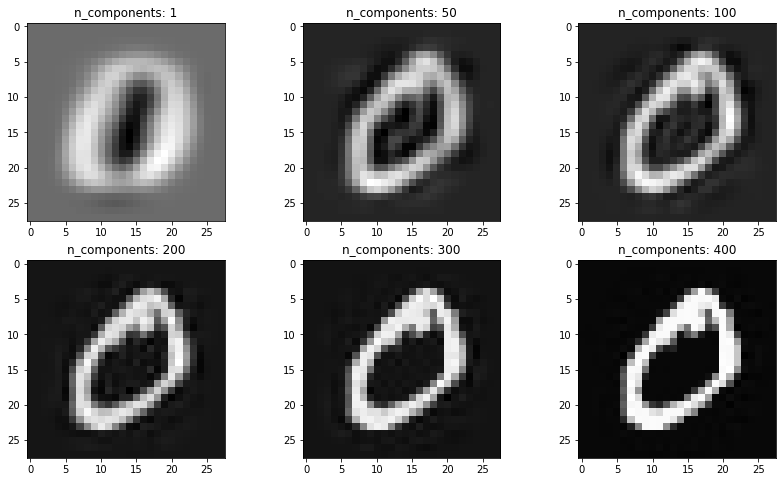

In [188]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,8))

# calculate cov matrix
cov_mat = np.cov(train_X.T)
U, S, VT = np.linalg.svd(cov_mat)                    # pca_i = PCA(n_components=i)

plot_num = 1
for i in [1, 50, 100, 200, 300, 400] :
    mnist_reduced = train_X.dot(VT[:i].T)                # mnist_reduced = pca_i.fit_transform(train_X)
    mnist_recovered = mnist_reduced.dot(VT[:i])          # mnist_recovered = pca_i.inverse_transform(mnist_reduced)
    image_pca = mnist_recovered[1,:].reshape([28,28])
    plt.subplot(2, 3, plot_num)
    plt.imshow(image_pca, cmap=plt.get_cmap('gray'))
    plt.title("n_components: {}".format(i))
    plot_num += 1
plt.show()

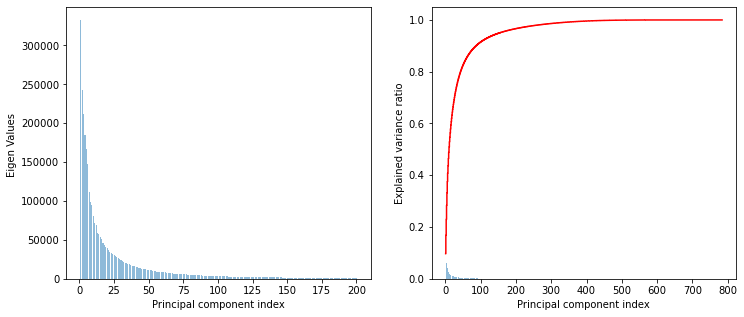

In [237]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1,2, figsize=(12,5))

# make a bar plot of the eigen values associated with each component
axs[0].bar(range(1,201), S[:200], alpha=0.5, align='center', label='Individual explained variance')
axs[0].set_ylabel('Eigen Values ')
axs[0].set_xlabel('Principal component index')

# let's look at the cumulative variance described by each component
tot = sum(S)
var_exp = [(i / tot) for i in sorted(S, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# make a bar plot of the variance associated with each component
axs[1].bar(range(1,785), var_exp, alpha=0.5, align='center', label='Individual explained variance')
axs[1].step(range(1,785), cum_var_exp, where='mid', label='Cumulative explained variance', color='red')
axs[1].set_ylabel('Explained variance ratio')
axs[1].set_xlabel('Principal component index')

plt.show()

We can also calculate the explained variance of 100 components:

In [241]:
cum_var_exp[100]*100

91.5612589731979

First, we’ll import the necessary packages to perform principal components regression (PCR) in Python:

In [250]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

However, when the predictor variables are highly correlated then multicollinearity can become a problem. This can cause the coefficient estimates of the model to be unreliable and have high variance.

One way to avoid this problem is to instead use principal components regression, which finds M linear combinations (known as “principal components”) of the original p predictors and then uses least squares to fit a linear regression model using the principal components as predictors.

This tutorial provides a step-by-step example of how to perform principal components regression in Python.

## Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

$$z_{i} = {{\ x_{i} - \bar{x}} \over \sigma}$$

In [251]:
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
X[0:5,:]

array([[  0.98, 514.5 , 294.  , 110.25,   7.  ,   2.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   3.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   4.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   5.  ,   0.  ,   0.  ],
       [  0.9 , 563.5 , 318.5 , 122.5 ,   7.  ,   2.  ,   0.  ,   0.  ]])

In [253]:
# Standardizing the features
x_std = StandardScaler().fit_transform(X)
x_std[0:5,:]

array([[ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -1.34164079, -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -0.4472136 , -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
         0.4472136 , -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
         1.34164079, -1.76044698, -1.81457514],
       [ 1.28497917, -1.22923856,  0.        , -1.19867787,  1.        ,
        -1.34164079, -1.76044698, -1.81457514]])

In [254]:
# Construct the covariance matrix.
cov_mat = np.cov(x_std.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

Raw Eigenvalues: 
 [3.70776711e+00 1.24146781e+00 5.28226666e-02 4.46132201e-03
 1.80198364e-16 7.88061902e-01 1.21454566e+00 1.00130378e+00]
Percentage of Variance Explained by Each Component: 
 [4.62867411e-01 1.54981414e-01 6.59423589e-03 5.56939125e-04
 2.24954664e-17 9.83794724e-02 1.51620528e-01 1.25000000e-01]


Sorting the eigenvalues by decreasing order to rank the eigenvectors and cumulate them to figure out how many PCs are we going to use.

In [255]:
# let's look at the cumulative variance described by each component
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.46286741, 0.61784882, 0.76946935, 0.89446935, 0.99284882,
       0.99944306, 1.        , 1.        ])

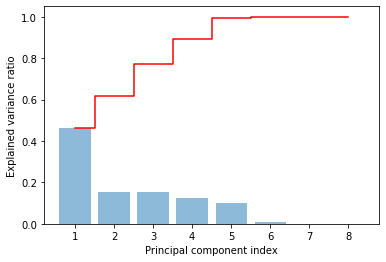

In [256]:
# make a bar plot of the variance associated with each component
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

## PCA using sklearn
After learning the steps of PCA, we can let sklearn to do the tedious and elaborate work

sklearn var:
 [4.62867411e-01 1.54981414e-01 1.51620528e-01 1.25000000e-01
 9.83794724e-02 6.59423589e-03 5.56939125e-04 2.19275719e-31]


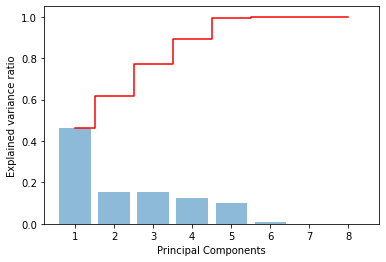

In [257]:
# define function
pca = PCA()

# fit_transform() is used to calculate the PCAs from training data
X_pca = pca.fit_transform(x_std)

# to get the fit statistics (variance explained per component)
print("sklearn var:\n", pca.explained_variance_ratio_)

# like we did above visualize the PCs 
# and the cumulative variance explained by each PC
plt.bar(range(1,9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,9), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [258]:
# Function of each component
np.around(pca.components_,3)

array([[ 0.496, -0.502,  0.033, -0.505,  0.496,  0.   ,  0.   ,  0.   ],
       [-0.245,  0.232,  0.894, -0.206,  0.21 , -0.   , -0.   ,  0.   ],
       [-0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.707, -0.707],
       [ 0.   , -0.   , -0.   ,  0.   ,  0.   , -1.   , -0.   , -0.   ],
       [ 0.   , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.707,  0.707],
       [ 0.495, -0.066,  0.291, -0.205, -0.79 ,  0.   ,  0.   ,  0.   ],
       [-0.67 , -0.505, -0.087, -0.45 , -0.293, -0.   ,  0.   ,  0.   ],
       [-0.   , -0.66 ,  0.327,  0.677,  0.   ,  0.   ,  0.   ,  0.   ]])

In [259]:
# New Features
X_pca

array([[ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02,  3.60585574e-14],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02, -4.46777189e-15],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02, -2.80976428e-15],
       ...,
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01,  1.93930284e-16],
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01,  2.50280583e-16],
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01,  3.06630881e-16]])

In [260]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"]
  
# calculating VIF for each component
vif_data["VIF"] = [variance_inflation_factor(X_pca, i)
                          for i in range(8)]
                          
print(vif_data)

  feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0
6     PC7  1.0
7     PC8  1.0


## Estimate Principal Component Regression with Statmodels 

In [261]:
## Estimate Principal Component Regression
X_pca_withone = sm.add_constant(X_pca)

# Create a model and fit it
model_pca = sm.OLS(y, X_pca_withone)
results = model_pca.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:25:01   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3072      0.106    210.678      0.0

# <font color = #4854E8> LASSO (L1) Regression with scikit-learn </font>

What is Regularization?
In a general manner, to make things regular or acceptable is what we mean by the term regularization. This is exactly why we use it for applied machine learning. In the domain of machine learning, regularization is the process which prevents overfitting by discouraging developers learning a more complex or flexible model, and finally, which regularizes or shrinks the coefficients towards zero. The basic idea is to penalize the complex models i.e. adding a complexity term in such a way that it tends to give a bigger loss for evaluating complex models.

There are mainly two types of regularization techniques, namely **Lasso Regression (L1 Regularization)** and **Ridge Regression (L2 Regularization)** . The way they assign a penalty to β (coefficients) is what differentiates them from each other.

Lasso Regression (L1 Regularization). This regularization technique performs L1 regularization. Unlike Ridge Regression, it modifies the RSS by adding the penalty (shrinkage quantity) equivalent to the sum of the absolute value of coefficients.

Looking at the equation below, we can observe that similar to Ridge Regression, Lasso (**Least Absolute Shrinkage and Selection Operator**) also penalizes the absolute size of the regression coefficients. In addition to this, it is quite capable of reducing the variability and improving the accuracy of linear regression models.

![](https://datascienceintuition.files.wordpress.com/2018/01/lr1.png)

- If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). In such cases, Lasso sometimes really has to struggle with such types of data.
- If there are two or more highly collinear variables, then LASSO regression select one of them which is not good for the interpretation of data.

Lasso regression differs from ridge regression in a way that it uses absolute values within the penalty function, rather than that of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. The more penalty is applied, the more the estimates get shrunk towards absolute zero. This helps to variable selection out of given range of n variables.

In [268]:
# Import library
from sklearn.linear_model import Lasso

In [271]:
# Define model
lasso_model = Lasso(alpha=0.1, max_iter = 5000)

# Fit the Lasso model
lasso_model.fit(X, y)

# Calculate model score (R square)
print("R Square:", lasso_model.score(X, y))

# Lasso Coeficients
print("Intercept:", lasso_model.intercept_)
print("Slope:", lasso_model.coef_)

R Square: 0.9055917500306945
Intercept: -25.67199935088815
Slope: [-0.00000000e+00  4.01453926e-03  4.81692259e-02 -0.00000000e+00
  4.92842241e+00 -0.00000000e+00  1.41309347e+01  2.68281344e-01]


## Estimate LASSO Regression using optimum Alpha

In [266]:
# Call function
from sklearn.model_selection import GridSearchCV

### Using GridSearchCV

In [284]:
# define model
lasso_model_cv = Lasso(max_iter = 5000)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
# define search
search = GridSearchCV(lasso_model_cv, grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. MSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. MSE : -13.502
Config best {'alpha': 0.1}


Text(0, 0.5, 'Neg. MSE')

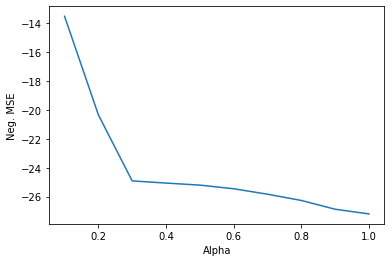

In [286]:
table = pd.pivot_table(pd.DataFrame(results.cv_results_), values='mean_test_score', index='param_alpha')
plt.plot(table)
plt.xlabel('Alpha')
plt.ylabel('Neg. MSE')

In [300]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:', np.round(results.best_estimator_.coef_,2))


coefficient of determination: 0.9055917500306945
intercept: -25.67199935088815
slope: [-0.    0.    0.05 -0.    4.93 -0.   14.13  0.27]


### Using LassoCV function

In [ ]:
# Call function
from sklearn.linear_model import LassoCV

In [302]:
# define evaluation method of the model
lasso_model_cv2 = LassoCV(alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], cv=5, max_iter = 5000).fit(X, y)
lasso_model_cv2.score(X, y)
print('Alpha:', lasso_model_cv2.alpha_)
print('intercept:',lasso_model_cv2.intercept_)
print('slope:', np.round(lasso_model_cv2.coef_,3))

Alpha: 0.1
intercept: -25.67199935088815
slope: [-0.0000e+00  4.0000e-03  4.8000e-02 -0.0000e+00  4.9280e+00 -0.0000e+00
  1.4131e+01  2.6800e-01]


# <font color = #4854E8> Ridge (L2) Regression with scikit-learn </font>

Ridge Regression (L2 Regularization). This technique performs L2 regularization. The main algorithm behind this is to modify the RSS by adding the penalty which is equivalent to the square of the magnitude of coefficients. However, it is considered to be a technique used when the info suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, albeit the smallest amount squares estimates (OLS) are unbiased, their variances are large which deviates the observed value faraway from truth value. By adding a degree of bias to the regression estimates, ridge regression reduces the quality errors. It tends to solve the multicollinearity problem through shrinkage parameter λ. Now, let us have a look at the equation below.

![av](https://datascienceintuition.files.wordpress.com/2018/01/re2.png) 

[Reference](https://www.analyticsinsight.net/intuition-behind-bias-variance-tradeoff-lasso-and-ridge-regression/)

In this equation, we have two components. The foremost one denotes the least square term and later one is lambda of the summation of β2 (beta- square) where β is the coefficient. This is added to least square term so as to shrink the parameter to possess a really low variance.

Every technique has some pros and cons, so as Ridge regression. It decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient tending to zero rather only minimizes it. Hence, this model is not a good fit for feature reduction.

In [303]:
# Import library
from sklearn.linear_model import Ridge

In [309]:
# define model
ridge_model_cv = Ridge(max_iter=5000)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
# define search
search = GridSearchCV(ridge_model_cv, grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. RMSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. RMSE : -3.205
Config best {'alpha': 0.1}


In [310]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:',np.round(results.best_estimator_.coef_,2))

coefficient of determination: 0.9148735698191437
intercept: 19.11255861166554
slope: [-2.911e+01 -2.000e-02  3.000e-02 -3.000e-02  4.920e+00 -2.000e-02
  1.978e+01  2.100e-01]


### Using RidgeCV function

In [312]:
# call function
from sklearn.linear_model import RidgeCV

In [316]:
# define evaluation method of the model
ridge_model_cv2 = RidgeCV(alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], cv=5, scoring="neg_root_mean_squared_error").fit(X, y)
ridge_model_cv2.score(X, y)
print('Alpha:', ridge_model_cv2.alpha_)
print('intercept:',ridge_model_cv2.intercept_)
print('slope:',np.round(ridge_model_cv2.coef_,2))

Alpha: 0.1
intercept: 19.11255861166554
slope: [-2.911e+01 -2.000e-02  3.000e-02 -3.000e-02  4.920e+00 -2.000e-02
  1.978e+01  2.100e-01]


# <font color = #4854E8> Elastic Net Regression with scikit-learn </font>

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process. In another source, it is said that Elastic Net first emerged as a result of critique on Lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of Ridge regression and Lasso to get the best of both worlds.

**Features of ElasticNet Regression:**
- It combines the L1 and L2 approaches.
- It performs a more efficient regularization process.
- It has two parameters to be set, λ and α.

The elastic net method improves on lasso’s limitations, i.e., where lasso takes a few samples for high dimensional data, the elastic net procedure provides the inclusion of “n” number of variables until saturation. In a case where the variables are highly correlated groups, lasso tends to choose one variable from such groups and ignore the rest entirely. Elastic Net aims at minimizing the following loss function:

![](https://miro.medium.com/max/589/1*XjDc54wcUkLcnSXmYjIH4Q.png)

Now let’s build a ElasticNet Regression model on a sample data set. And then let’s calculate the square root of the model’s Mean Squared Error This will give us the model error. First of all, we import the libraries necessary for modeling as usual.

In [318]:
# Import library
from sklearn.linear_model import ElasticNet

In [320]:
# define model
elastic_model_cv = ElasticNet(max_iter=5000)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
# define search
search = GridSearchCV(elastic_model_cv, grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. RMSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. RMSE : -3.532
Config best {'alpha': 0.1, 'l1_ratio': 1.0}


In [322]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:', np.round(results.best_estimator_.coef_,4))

coefficient of determination: 0.9055917500306945
intercept: -25.67199935088815
slope: [-0.00000e+00  4.00000e-03  4.82000e-02 -0.00000e+00  4.92840e+00
 -0.00000e+00  1.41309e+01  2.68300e-01]


# <font color = #4854E8> StepWise Regression ? </font>